In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import pandas as pd

In [2]:
def display_data_and_boundary(x, y, pred_fn, ax):
    x1min, x1max = min(x[:,0]) - 1, max(x[:, 0]) + 1
    x2min, x2max = min(x[:,1]) - 1, max(x[:, 1]) + 1
    k = int(max(y)) + 1
    ax.set(xlim = (x1min, x1max), ylim = (x2min, x2max))
    
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([pred_fn(pt) for pt in grid]).reshape(xx1.shape)
    # Show the classifier's boundary using a color plot
    ax.pcolormesh(xx1, xx2, Z, cmap = plt.cm.Pastel1, vmin = 0, vmax = k, shading = 'auto')
    
    colors = ('r', 'k', 'b','g')
    markers = ('o', '^', '*', 'x')
    for label in range(k):
        ax.scatter(
            x[(y == label), 0], x[(y == label), 1], 
            c = colors[label % 4],
            marker = markers[label % 4],
            s = 15,
            cmap = plt.cm.Pastel1
        )

## 1. Thử chạy SVM trên 2 files data_3.txt và data_4.txt với C=[0.1, 1.0, 10.0, 100.0]

In [3]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_3.txt',
    sep = ' ', comment = '#', header = None
).drop(columns = 3)

In [4]:
data.head()

,0,1,2
0,1,1,0
1,1,2,0
2,1,3,0
3,2,1,0
4,2,2,0


In [5]:
data.tail()

,0,1,2
43,9,9,3
44,9,10,3
45,10,8,3
46,10,9,3
47,10,10,3


In [6]:
X, y = data.iloc[:, :2].to_numpy(), data.iloc[:, -1].to_numpy()

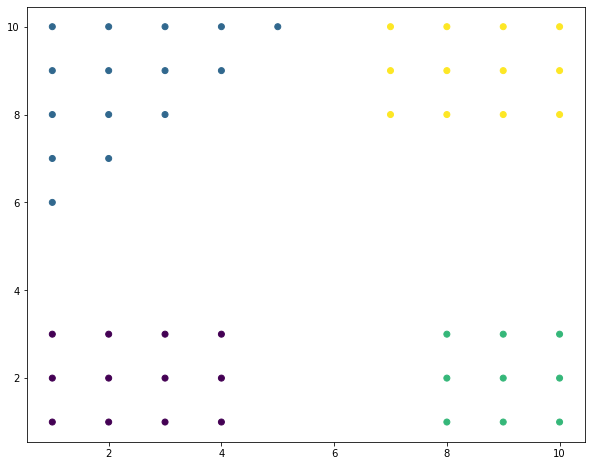

In [7]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.scatter(X[:, 0], X[:, 1], c = y)

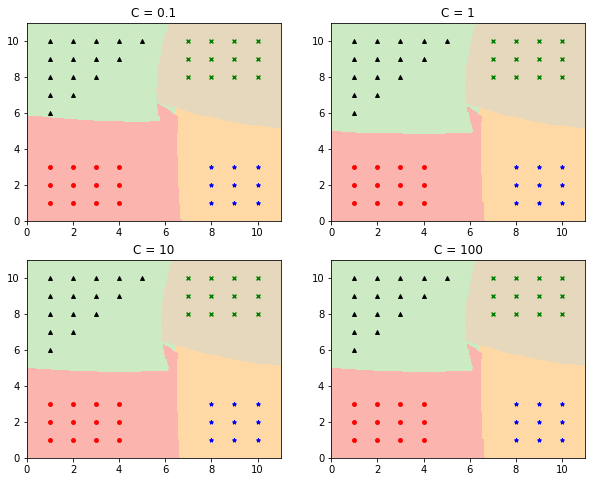

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
for C, ax in zip((0.1, 1, 10, 100), axes.flatten()):
    clf = SVC(C = C, kernel = 'poly').fit(X, y)
    display_data_and_boundary(
        X, y, lambda p: clf.predict(p.reshape(1, -1)), ax
    )
    ax.set(title = f'C = {C}')
plt.show()

In [9]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_4.txt',
    sep = ' ', comment = '#', header = None
).drop(columns = 3)

In [10]:
data.head()

,0,1,2
0,2,1,0
1,3,1,0
2,3,2,0
3,4,1,0
4,4,2,0


In [11]:
data.tail()

,0,1,2
55,9,5,2
56,9,6,2
57,9,7,2
58,9,8,2
59,9,9,2


In [12]:
X, y = data.iloc[:, :2].to_numpy(), data.iloc[:, -1].to_numpy()

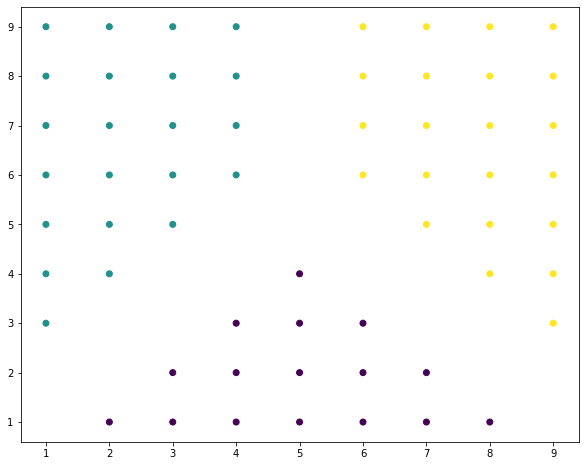

In [13]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.scatter(X[:, 0], X[:, 1], c = y)

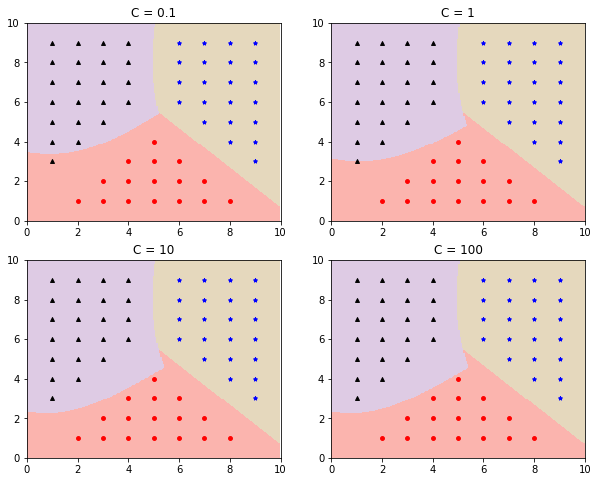

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
for C, ax in zip((0.1, 1, 10, 100), axes.flatten()):
    clf = SVC(C = C, kernel = 'poly').fit(X, y)
    display_data_and_boundary(
        X, y, lambda p: clf.predict(p.reshape(1, -1)), ax
    )
    ax.set(title = f'C = {C}')
plt.show()

## 2. Nhận xét với từng $C$ khác nhau thì mô hình thay đổi như thế nào

<ul>
    <li> <big> Với $C$ nhỏ, mô hình cho phép bị misclassified các điểm. 
        Nếu $C$ rất nhỏ, dẫn đến model misclassified nhiều điểm và do đó model underfit
        </big> </li>
    <li>
        <big>
            Khi $C$ tăng dần, decision boundary ở các lớp được mở rộng ra, cố gắng bao lấy các điểm trong 1 lớp,
            hạn chế misclassified, và khi $C$ đủ lớn, kết quả có được sẽ tương tự như kết quả của hard-margin SVM
        </big>
    </li>
</ul>

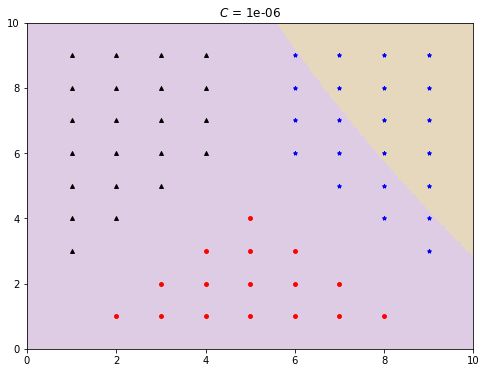

In [15]:
# Trường hợp C rất nhỏ
fig, ax = plt.subplots(figsize = (8, 6))
clf = SVC(C = 1e-6, kernel = 'poly').fit(X, y)
display_data_and_boundary(
    X, y, lambda p: clf.predict(p.reshape(1, -1)), ax
)
ax.set(title = f'$C$ = {1e-6}')
plt.show()

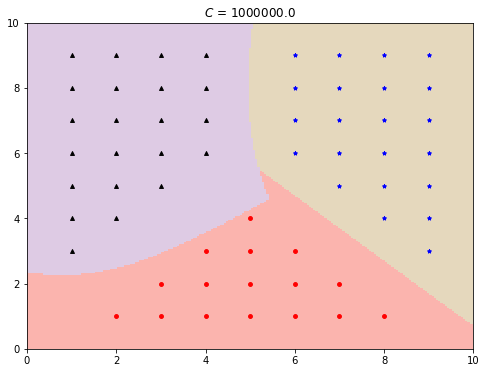

In [16]:
# Trường hợp C rất lớn
fig, ax = plt.subplots(figsize = (8, 6))
clf = SVC(C = 1e6, kernel = 'poly').fit(X, y)
display_data_and_boundary(
    X, y, lambda p: clf.predict(p.reshape(1, -1)), ax
)
ax.set(title = f'$C$ = {1e6}')
plt.show()

## 3. Nêu lợi và hại khi tăng $\gamma$ và giảm $\gamma$

Tham số $\gamma$ được dùng để đánh giá mức độ ảnh hưởng của một training sample với các điểm xung quanh nó <br/> Khi $\gamma$ lớn chứng tỏ mức độ ảnh hưởng của một training sample với các điểm xung quanh là nhỏ (label của training sample chỉ ảnh hưởng đến label của một vài điểm lân cận) <br/> 
Khi $\gamma$ nhỏ chứng tỏ mức độ ảnh hưởng của một training sample là lớn (label của training sample này ảnh hưởng đến nhiều train sample khác xung quanh nó)
<ul>
   <li> <big> Khi tăng $\gamma$: </big> </li>
    <ul>
        <li> Lợi: Độ ảnh hưởng của một training sample giảm, tăng tính local của model và
            giúp accuracy trên train tăng </li>
        <li> Hại: Nếu $\gamma$ quá lớn, dẫn đến overfit trên tập train </li>
    </ul>
    <li> <big> Khi giảm $\gamma$: </big> </li>
    <ul>
        <li> Lợi: Độ ảnh hưởng của training sample tăng, tăng tính global của model, tăng độ linh động dẫn đến
            model cho phép misclassified một vài training sample và do đó giúp tránh overfit
        </li>
        <li> Hại: Nếu $\gamma$ quá nhỏ, dẫn đến underfit trên tập train
        </li>
    </ul>
</ul>

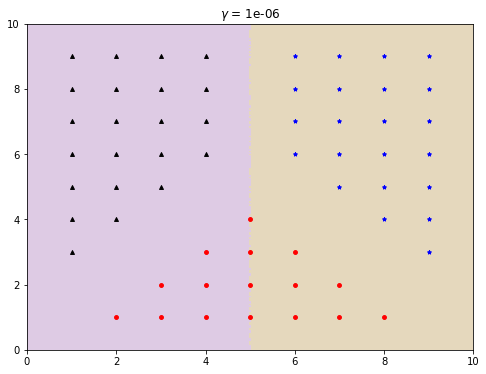

In [17]:
# Khi $\gamma$ quá nhỏ
fig, ax = plt.subplots(figsize = (8, 6))
clf = SVC(C = 1, kernel="rbf",gamma = 1e-6).fit(X, y)
display_data_and_boundary(
    X, y, lambda p: clf.predict(p.reshape(1, -1)), ax
)
ax.set(title = f'$\gamma$ = {1e-6}')
plt.show()

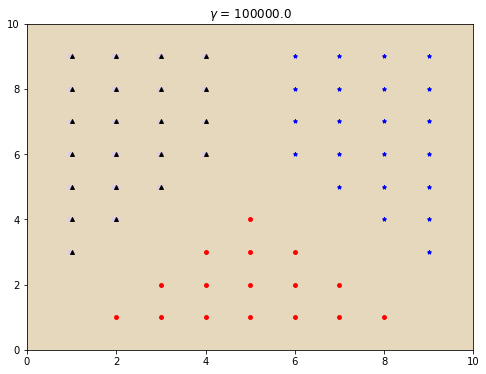

In [18]:
# Khi $\gamma$ quá lớn
fig, ax = plt.subplots(figsize = (8, 6))
clf = SVC(C = 1, kernel = 'rbf', gamma = 1e5).fit(X, y)
display_data_and_boundary(
    X, y, lambda p: clf.predict(p.reshape(1, -1)), ax
)
ax.set(title = f'$\gamma$ = {1e5}')
plt.show()
# Decision boundary của mỗi lớp là các điểm nằm trong lớp đó (thay vì là tập hợp các điểm)